Mushrooms classifications algorithms models comparisons and applications 
The following file represent a series of three algorithms to categorize, classify and eventually decide the edibility of a mushroom. The project doesn’t use a single algorithm or strategy, but several ones. However, before using those, the first part involves in the classification and rename of data included in the table provided. Those data are delivered with a table, with 24 columns representing features of single examples of mushrooms. The data are written using several letters, different from column to column, using always Latin alphabet and letters different from column to column, based on the aspect they are representing in the specific case. This represents a problem for most algorithms since they need numerical data in order to work properly. The problem therefore was overcome thanks to the use of the one-hot conversion, which changes every alphabetic value to a numerical one, as a integer between 0 and 1, by creating a specific column for every letter (intended as original feature) and inserting a 1 if the column[letter] effectively represents the original value, 0 elsewhere (the other column representing other possible letters for the feature). Therefore, the data now can be used with models that otherwise would be impossible, however this adds complexity since the number of columns became considerably bigger and complex. As today, the data have not been refined or cleaned, so the different models operate by using all data available. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("agaricus-lepiota.csv")
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.head(1)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [4]:
df.rename(columns = {
    'p':'Edible',
    'x':'Cap Shape',
    's':'Cap Surface',
    'n':'Cap Color',
    't':'Bruices?',
    'p.1':'Odor',
    'f':'Gill Attatchment',
    'c':'Gill Spacing',
    'n.1':'Gill Size',
    'k':'Gill Color',
    'e':'Stalk Shape',
    'e.1':'Stalk Root',
    's.1':'Salk Surface Above Ring',
    's.2':'Stalk Surface Below Ring',
    'w':'Stalk Color Above Ring',
    'w.1':'Stalk Color Below Ring',
    'p.2':'Veil Type',
    'w.2':'Veil Color',
    'o':'Ring Number',
    'p.3':'Ring Type',
    'k.1':'Spore Print Color',
    's.3':'Population',
    'u':'Habitat',
}, inplace = True)
df

,Edible,Cap Shape,Cap Surface,Cap Color,Bruices?,Odor,Gill Attatchment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
df = pd.get_dummies(df)

In [6]:
df

,Edible_e,Edible_p,Cap Shape_b,Cap Shape_c,Cap Shape_f,Cap Shape_k,Cap Shape_s,Cap Shape_x,Cap Surface_f,Cap Surface_g,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8119,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


<AxesSubplot:title={'center':'Person Correlation of Features'}>

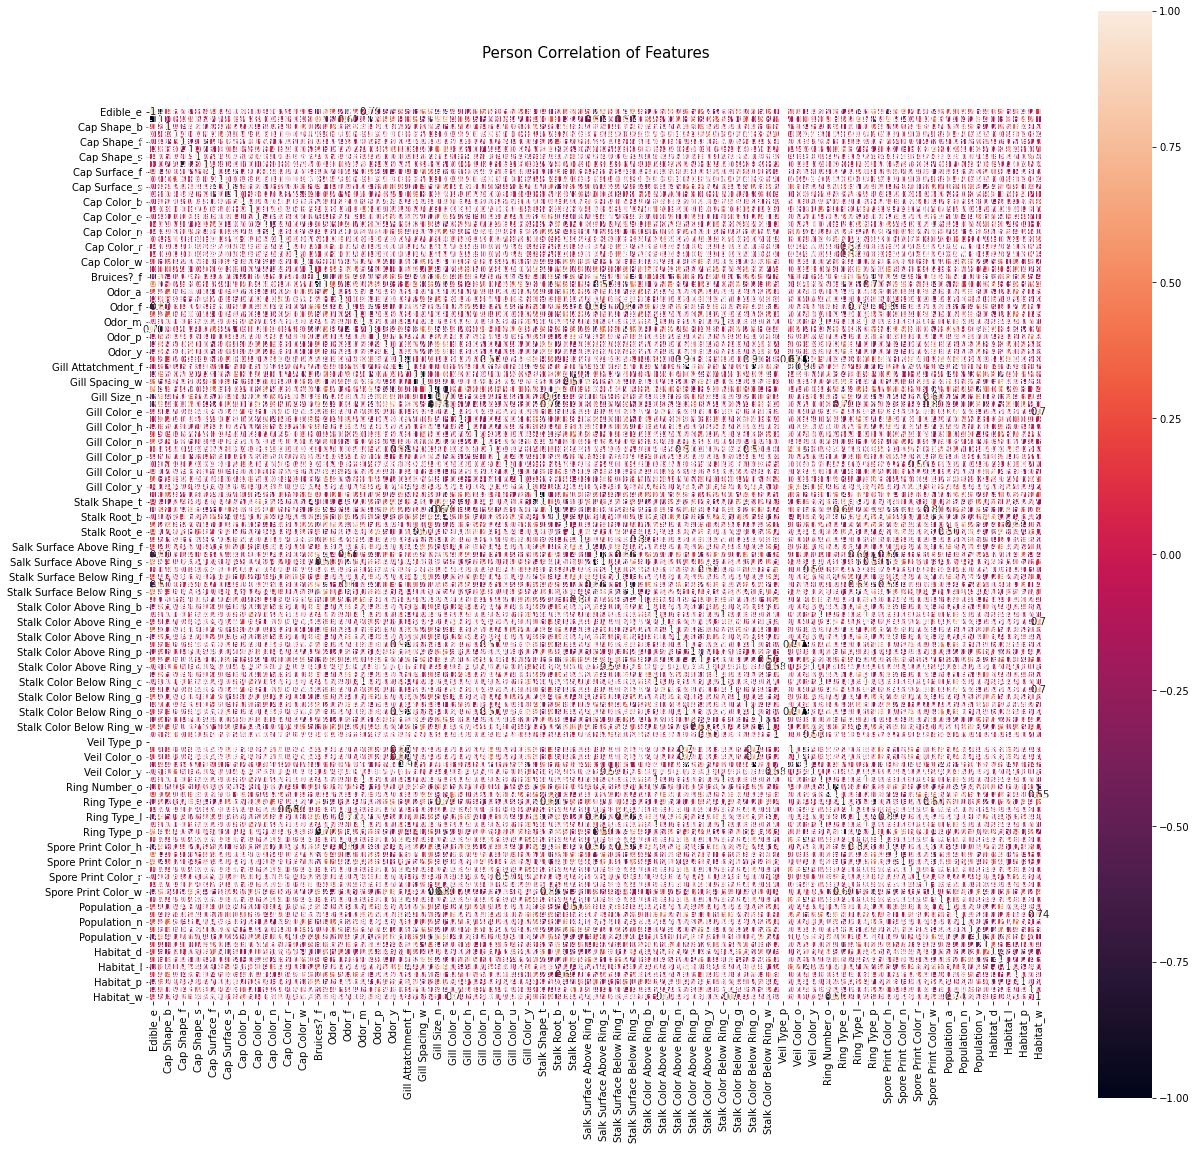

In [7]:
plt.figure(figsize=(20,20))
plt.title('Person Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)

In [8]:
y = df.loc[:,"Edible_e"]
x = df = df.drop(["Edible_e", "Edible_p"], axis=1)
y.head(50)

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    1
16    0
17    0
18    0
19    1
20    0
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    1
30    0
31    1
32    1
33    1
34    1
35    1
36    0
37    1
38    1
39    1
40    1
41    1
42    0
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Edible_e, dtype: uint8

In [9]:
df.dtypes.tail(50)

Stalk Color Above Ring_g    uint8
Stalk Color Above Ring_n    uint8
Stalk Color Above Ring_o    uint8
Stalk Color Above Ring_p    uint8
Stalk Color Above Ring_w    uint8
Stalk Color Above Ring_y    uint8
Stalk Color Below Ring_b    uint8
Stalk Color Below Ring_c    uint8
Stalk Color Below Ring_e    uint8
Stalk Color Below Ring_g    uint8
Stalk Color Below Ring_n    uint8
Stalk Color Below Ring_o    uint8
Stalk Color Below Ring_p    uint8
Stalk Color Below Ring_w    uint8
Stalk Color Below Ring_y    uint8
Veil Type_p                 uint8
Veil Color_n                uint8
Veil Color_o                uint8
Veil Color_w                uint8
Veil Color_y                uint8
Ring Number_n               uint8
Ring Number_o               uint8
Ring Number_t               uint8
Ring Type_e                 uint8
Ring Type_f                 uint8
Ring Type_l                 uint8
Ring Type_n                 uint8
Ring Type_p                 uint8
Spore Print Color_b         uint8
Spore Print Co

The cell below is used to create falty data.

In [10]:
#y[:1] = [0 for i in range(1)]

In [11]:
y.head(50)

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    1
16    0
17    0
18    0
19    1
20    0
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    1
30    0
31    1
32    1
33    1
34    1
35    1
36    0
37    1
38    1
39    1
40    1
41    1
42    0
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Edible_e, dtype: uint8

In [12]:
x

,Cap Shape_b,Cap Shape_c,Cap Shape_f,Cap Shape_k,Cap Shape_s,Cap Shape_x,Cap Surface_f,Cap Surface_g,Cap Surface_s,Cap Surface_y,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8119,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8120,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [13]:
y

0       1
1       1
2       0
3       1
4       1
       ..
8118    1
8119    1
8120    1
8121    0
8122    1
Name: Edible_e, Length: 8123, dtype: uint8

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=18)

As of today, once divided the dataset into training and fitting categories we have implemented the following models:

1)    Decision tree: The first model implemented uses a simple structure where for every possible choice of values, based on the input, one path is taken and the process repeats itself based on the amount of data (and therefore choices) available for the input and deliver a result based on previous choices and values.
2)    KNN neighbourhood models is used with five neighbourhoods and try to classify elements based on how near values are to the database original one. The database is divided into groups, also called neighbourhoods, and every input is confronted on how near is to one of the groups and based on this the aforementioned algorithm makes a prediction on what the input should be. 
3)    Neural network uses several nodes to perform operations and made predictions to be continued

In [15]:
clf = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=5000)

clf.fit(x_train, y_train)
knn.fit(x_train, y_train)
mlp.fit(x_train, y_train)

clf_prediction = clf.predict(x_test)
knn_prediction = knn.predict(x_test)
mlp_prediction = mlp.predict(x_test)


In [16]:
print("Decision tree accuracy:", accuracy_score(y_test, clf_prediction))
print("K-nearest neighbor accuracy:", accuracy_score(y_test, knn_prediction))
print("Neural network accuracy:", accuracy_score(y_test, mlp_prediction))

Decision tree accuracy: 1.0
K-nearest neighbor accuracy: 1.0
Neural network accuracy: 1.0


We got an accuracy of 1.0. This means the algorithm predicted correctly wether the mushrooms in the test set were poisonous or not in every case. Sometimes this can be the result of a data-leakage. To investigate this we added some faulty data to se if our accuracy decreased appropriately. It did. We also tried to locate any bugs by looking through our code. 

After failing to locate any errors, we searched online to see if there were others who had recieved similar results. This seemed to be the case. With this knowledge we felt confident that our results were accurat, and that our model would performe well on new unseen data from the same source as the dataset we were provided.

What does an accuracy of 1 mean? First it is important to note that with a finite dataset it is impossible to test whether a model always gives accurate predictions. With a test data set of 8122 * 0.5 = 4561 we can estimate an accuracy of at least 4561/4562. Secondly, an accuracy of 1 on this dataset tells us how well our model does on data that is generated in the same way that our dataset is. It does not nessecerily tell us anything about a dataset that is generated in a differen. If our model is trained on mushrooms from north-america, it may get larger errors, or be completely useless on mushrooms from china for instance. 

Would you trust it to classify a mushroom for you to eat?